<a href="https://colab.research.google.com/github/iam7mza/EventClassification/blob/main/Event_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone "https://github.com/iam7mza/EventClassification.git"
!mv EventClassification/* ./
!rm -rf EventClassification
!rm -rf sample_data

Cloning into 'EventClassification'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 188 (delta 41), reused 154 (delta 18), pack-reused 0 (from 0)
Receiving objects: 100% (188/188), 5.94 MiB | 6.72 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [14]:
#importing data
#importing data lol
#haha
import loader
import numpy as np
import pandas as pd

filepath = "csv_output"
df = loader.load(filepath)
loader.clean(df); #to clean the data

Found 92 CSV files
Processing: csv_output/Zee_PTV140_280_CVetoBVeto_sample200.csv
  -> Added 200 events (event name: Zee_PTV140_280_CVetoBVeto)
Processing: csv_output/GG_ttn1_1200_5000_600_sample200.csv
  -> Added 200 events (event name: GG_ttn1_1200_5000_600)
Processing: csv_output/Wenu_PTV70_140_CFilterBVeto_sample200.csv
  -> Added 200 events (event name: Wenu_PTV70_140_CFilterBVeto)
Processing: csv_output/Ztautau_PTV140_280_CVetoBVeto_sample200.csv
  -> Added 200 events (event name: Ztautau_PTV140_280_CVetoBVeto)
Processing: csv_output/Ztautau_sample200.csv
  -> Added 200 events (event name: Ztautau)
Processing: csv_output/Ztautau_PTV280_500_CFilterBVeto_sample200.csv
  -> Added 200 events (event name: Ztautau_PTV280_500_CFilterBVeto)
Processing: csv_output/Wmunu_PTV70_140_BFilter_sample200.csv
  -> Added 200 events (event name: Wmunu_PTV70_140_BFilter)
Processing: csv_output/Zee_PTV0_70_CFilterBVeto_sample200.csv
  -> Added 200 events (event name: Zee_PTV0_70_CFilterBVeto)
Process

In [15]:
df = df[df['numeric_target'] != -1]  #dropping all the unknown events
df

,event,runNumber,eventNumber,channelNumber,mcWeight,XSection,SumWeights,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,...,lep_pt_syst,met_et_syst,jet_pt_syst,photon_pt_syst,largeRjet_pt_syst,tau_pt_syst,full_event_name,onehot_target,numeric_target,event_type
0,108,284500,3836,364120,1.000000,24.4419,2966340.0,1.214120,0.950294,1.0,...,"[1152.7, 123.1]",6547.86,"[4260.39, 4445.17]","[0, 0]","[16565.1, 0]","[0, 0]",Zee_PTV140_280_CVetoBVeto,"[0.0, 0.0, 1.0, 0.0, 0.0]",2,Z
1,113,284500,4477,364120,1.000000,24.4419,2966340.0,1.264590,0.974854,1.0,...,"[2298.15, 762.819]",124.07,"[3612.87, 2251.89]","[0, 0]","[4372.88, 12608]","[0, 0]",Zee_PTV140_280_CVetoBVeto,"[0.0, 0.0, 1.0, 0.0, 0.0]",2,Z
2,644,284500,231331,364120,-1.000000,24.4419,2966340.0,0.750880,0.963289,1.0,...,"[1490.74, 154.628]",9481.89,"[7365.12, 3497.21]","[0, 0]","[11112.4, 0]","[0, 0]",Zee_PTV140_280_CVetoBVeto,"[0.0, 0.0, 1.0, 0.0, 0.0]",2,Z
3,654,284500,176066,364120,-1.000000,24.4419,2966340.0,0.750880,0.969361,1.0,...,"[2715.15, 78.9026]",18731.10,"[6634.03, 2990.78, 2732.48, 1403.22]","[0, 0]","[9840.02, 0]","[0, 0]",Zee_PTV140_280_CVetoBVeto,"[0.0, 0.0, 1.0, 0.0, 0.0]",2,Z
4,778,284500,660280,364120,1.000000,24.4419,2966340.0,0.553627,1.005880,1.0,...,"[2562.73, 0]",15885.20,"[2677.36, 4293.58]","[0, 0]","[18084.3, 0]","[0, 0]",Zee_PTV140_280_CVetoBVeto,"[0.0, 0.0, 1.0, 0.0, 0.0]",2,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,1024,284500,1939947,364117,-0.984223,74.9038,2164250.0,0.738662,0.955630,1.0,...,"[3634.91, 6728.82]",1291.60,"[3400.3, 0]","[0, 0]","[13845.9, 45347]","[0, 0]",Zee_PTV70_140_CVetoBVeto,"[0.0, 0.0, 1.0, 0.0, 0.0]",2,Z
18396,1032,284500,676302,364117,-1.000000,74.9038,2164250.0,0.619412,0.960302,1.0,...,"[5365.51, 1231.14]",3806.01,"[5708.22, 0]","[0, 0]","[22608.1, 9966.56]","[0, 0]",Zee_PTV70_140_CVetoBVeto,"[0.0, 0.0, 1.0, 0.0, 0.0]",2,Z
18397,1033,284500,596056,364117,1.022820,74.9038,2164250.0,0.696077,0.998255,1.0,...,"[9236.4, 8954.28]",1265.97,"[3301.25, 0]","[0, 0]","[4579.44, 44631.8]","[0, 0]",Zee_PTV70_140_CVetoBVeto,"[0.0, 0.0, 1.0, 0.0, 0.0]",2,Z
18398,1038,284500,700960,364117,-1.000000,74.9038,2164250.0,0.000000,0.992110,1.0,...,"[1072.46, 0]",9641.92,"[9266.82, 2514.17]","[0, 0]","[9555.41, 0]","[0, 0]",Zee_PTV70_140_CVetoBVeto,"[0.0, 0.0, 1.0, 0.0, 0.0]",2,Z


In [16]:
# Check unique event types and their corresponding targets
event_target_mapping = df[['event_type', 'numeric_target']].drop_duplicates().sort_values('numeric_target')
print("Event type to target mapping:")
print(event_target_mapping)


Event type to target mapping:
      event_type  numeric_target
1600          VV               0
400            W               1
0              Z               2
3600   singletop               3
14400      ttbar               4


In [17]:
df.columns

Index(['event', 'runNumber', 'eventNumber', 'channelNumber', 'mcWeight',
       'XSection', 'SumWeights', 'scaleFactor_PILEUP', 'scaleFactor_ELE',
       'scaleFactor_MUON', 'scaleFactor_PHOTON', 'scaleFactor_TAU',
       'scaleFactor_BTAG', 'scaleFactor_LepTRIGGER',
       'scaleFactor_PhotonTRIGGER', 'trigE', 'trigM', 'trigP', 'lep_n',
       'lep_truthMatched', 'lep_trigMatched', 'lep_pt', 'lep_eta', 'lep_phi',
       'lep_E', 'lep_z0', 'lep_charge', 'lep_type', 'lep_isTightID',
       'lep_ptcone30', 'lep_etcone20', 'lep_trackd0pvunbiased',
       'lep_tracksigd0pvunbiased', 'met_et', 'met_phi', 'jet_n', 'jet_pt',
       'jet_eta', 'jet_phi', 'jet_E', 'jet_jvt', 'jet_trueflav',
       'jet_truthMatched', 'jet_MV2c10', 'photon_n', 'photon_truthMatched',
       'photon_trigMatched', 'photon_pt', 'photon_eta', 'photon_phi',
       'photon_E', 'photon_isTightID', 'photon_ptcone30', 'photon_etcone20',
       'photon_convType', 'largeRjet_n', 'largeRjet_pt', 'largeRjet_eta',
       'larg

In [18]:
# the chosen ones
TheChosenOnes = ['XSection', 'trigE', 'trigM', 'trigP', 'lep_n','lep_pt', 'lep_eta', 'lep_phi',
       'lep_E', 'lep_z0', 'lep_charge', 'lep_type', 'lep_isTightID',
       'lep_ptcone30', 'lep_etcone20', 'lep_trackd0pvunbiased',
       'lep_tracksigd0pvunbiased', 'met_et', 'met_phi', 'jet_n', 'jet_pt',
       'jet_eta', 'jet_phi', 'jet_E', 'jet_jvt','jet_MV2c10', 'photon_n','photon_pt', 'photon_eta', 'photon_phi',
       'photon_E', 'photon_isTightID', 'photon_ptcone30', 'photon_etcone20',
       'photon_convType', 'largeRjet_n', 'largeRjet_pt', 'largeRjet_eta',
       'largeRjet_phi', 'largeRjet_E', 'largeRjet_m','largeRjet_D2', 'largeRjet_tau32', 'tau_n', 'tau_pt', 'tau_eta',
       'tau_phi', 'tau_E', 'tau_charge', 'tau_isTightID', 'tau_nTracks', 'tau_BDTid', 'ditau_m', 'lep_pt_syst',
       'met_et_syst', 'jet_pt_syst', 'photon_pt_syst', 'largeRjet_pt_syst',
       'tau_pt_syst']


df[TheChosenOnes]

,XSection,trigE,trigM,trigP,lep_n,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,...,tau_isTightID,tau_nTracks,tau_BDTid,ditau_m,lep_pt_syst,met_et_syst,jet_pt_syst,photon_pt_syst,largeRjet_pt_syst,tau_pt_syst
0,24.4419,1,0,0,2,"[221327, 35730]","[-0.411087, -0.0759888]","[-0.982657, 0.0342098]","[240293, 35833.2]","[-0.0301456, 0.0717487]",...,"[0, 0]","[0, 0]","[0, 0]",0,"[1152.7, 123.1]",6547.86,"[4260.39, 4445.17]","[0, 0]","[16565.1, 0]","[0, 0]"
1,24.4419,1,0,0,2,"[174126, 108471]","[0.605153, 0.327679]","[0.98274, 0.375016]","[206994, 114347]","[-0.101692, -0.20262]",...,"[0, 0]","[0, 0]","[0, 0]",0,"[2298.15, 762.819]",124.07,"[3612.87, 2251.89]","[0, 0]","[4372.88, 12608]","[0, 0]"
2,24.4419,1,0,0,2,"[211505, 36322.9]","[-0.79617, -0.36803]","[0.752619, 1.73861]","[282156, 38810.7]","[-0.030364, -0.0375566]",...,"[0, 0]","[0, 0]","[0, 0]",0,"[1490.74, 154.628]",9481.89,"[7365.12, 3497.21]","[0, 0]","[11112.4, 0]","[0, 0]"
3,24.4419,1,0,0,2,"[215523, 10942.1]","[1.25156, 2.04416]","[-1.22038, -1.41467]","[407538, 42959.6]","[0.00849915, 0.0539513]",...,"[0, 0]","[0, 0]","[0, 0]",0,"[2715.15, 78.9026]",18731.10,"[6634.03, 2990.78, 2732.48, 1403.22]","[0, 0]","[9840.02, 0]","[0, 0]"
4,24.4419,1,0,0,1,"[232730, 0]","[1.12948, 0]","[-1.67486, 0]","[397648, 0]","[0.0303574, 0]",...,"[0, 0]","[0, 0]","[0, 0]",0,"[2562.73, 0]",15885.20,"[2677.36, 4293.58]","[0, 0]","[18084.3, 0]","[0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,74.9038,1,0,0,2,"[456017, 389713]","[-0.678132, -1.35049]","[1.755, -1.58344]","[564950, 802503]","[0.0339756, -0.000947952]",...,"[0, 0]","[0, 0]","[0, 0]",0,"[3634.91, 6728.82]",1291.60,"[3400.3, 0]","[0, 0]","[13845.9, 45347]","[0, 0]"
18396,74.9038,1,0,0,2,"[295586, 241272]","[1.71892, 0.393511]","[-2.35478, 0.986508]","[850958, 260195]","[-0.0227585, 0.00547218]",...,"[0, 0]","[0, 0]","[0, 0]",0,"[5365.51, 1231.14]",3806.01,"[5708.22, 0]","[0, 0]","[22608.1, 9966.56]","[0, 0]"
18397,74.9038,1,0,0,2,"[664978, 590943]","[0.914274, 0.592236]","[-2.68139, 0.363068]","[962813, 697642]","[-0.0464573, 0.0590801]",...,"[0, 0]","[0, 0]","[0, 0]",0,"[9236.4, 8954.28]",1265.97,"[3301.25, 0]","[0, 0]","[4579.44, 44631.8]","[0, 0]"
18398,74.9038,1,0,0,1,"[190639, 0]","[-0.669712, 0]","[0.308146, 0]","[235013, 0]","[0.00860977, 0]",...,"[0, 0]","[0, 0]","[0, 0]",0,"[1072.46, 0]",9641.92,"[9266.82, 2514.17]","[0, 0]","[9555.41, 0]","[0, 0]"


In [19]:
#extracting the features for lists (only first two elements)
# Separate list and scalar columns
list_cols = []
scalar_cols = []

for col in TheChosenOnes:
    if col in df.columns:
        if isinstance(df[col][0], list):
            list_cols.append(col)
        else:
            scalar_cols.append(col)

print(f"List columns: {len(list_cols)}")
print(f"Scalar columns: {len(scalar_cols)}")

# Extract all list features at once
extracted_data = {}

# Add scalar columns
for col in scalar_cols:
    extracted_data[col] = df[col]

# Add list-derived columns
for col in list_cols:
    extracted_data[f'{col}_first'] = df[col].apply(lambda x: x[0] if len(x) > 0 else 0)
    extracted_data[f'{col}_second'] = df[col].apply(lambda x: x[1] if len(x) > 1 else 0)


# Create final dataframe in one go
df_extracted = pd.DataFrame(extracted_data)

print(f"Final shape: {df_extracted.shape}")
df_extracted

List columns: 46
Scalar columns: 13
Final shape: (16000, 105)


,XSection,trigE,trigM,trigP,lep_n,met_et,met_phi,jet_n,photon_n,largeRjet_n,...,lep_pt_syst_first,lep_pt_syst_second,jet_pt_syst_first,jet_pt_syst_second,photon_pt_syst_first,photon_pt_syst_second,largeRjet_pt_syst_first,largeRjet_pt_syst_second,tau_pt_syst_first,tau_pt_syst_second
0,24.4419,1,0,0,2,12417.8,2.303980,2,0,1,...,1152.70,123.1000,4260.39,4445.17,0,0,16565.10,0.00,0,0
1,24.4419,1,0,0,2,19981.0,1.726960,2,0,2,...,2298.15,762.8190,3612.87,2251.89,0,0,4372.88,12608.00,0,0
2,24.4419,1,0,0,2,24468.7,0.706439,2,0,1,...,1490.74,154.6280,7365.12,3497.21,0,0,11112.40,0.00,0,0
3,24.4419,1,0,0,2,38292.6,-2.332050,4,0,1,...,2715.15,78.9026,6634.03,2990.78,0,0,9840.02,0.00,0,0
4,24.4419,1,0,0,1,39367.8,1.561150,2,0,1,...,2562.73,0.0000,2677.36,4293.58,0,0,18084.30,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,74.9038,1,0,0,2,11871.0,0.911178,1,0,2,...,3634.91,6728.8200,3400.30,0.00,0,0,13845.90,45347.00,0,0
18396,74.9038,1,0,0,2,18971.1,-1.907840,1,0,2,...,5365.51,1231.1400,5708.22,0.00,0,0,22608.10,9966.56,0,0
18397,74.9038,1,0,0,2,10210.0,-1.022330,1,0,2,...,9236.40,8954.2800,3301.25,0.00,0,0,4579.44,44631.80,0,0
18398,74.9038,1,0,0,1,43917.1,0.046963,2,0,1,...,1072.46,0.0000,9266.82,2514.17,0,0,9555.41,0.00,0,0


In [20]:
#dropping columns that are all zeros
for col in df_extracted.columns:
    if np.sum(df_extracted[col]) == 0:
        print(f"Column {col} is all zeros, dropping it.")
        df_extracted.drop(columns=[col], inplace=True)


df_extracted

Column trigP is all zeros, dropping it.
Column photon_n is all zeros, dropping it.
Column tau_n is all zeros, dropping it.
Column ditau_m is all zeros, dropping it.
Column photon_pt_first is all zeros, dropping it.
Column photon_pt_second is all zeros, dropping it.
Column photon_eta_first is all zeros, dropping it.
Column photon_eta_second is all zeros, dropping it.
Column photon_phi_first is all zeros, dropping it.
Column photon_phi_second is all zeros, dropping it.
Column photon_E_first is all zeros, dropping it.
Column photon_E_second is all zeros, dropping it.
Column photon_isTightID_first is all zeros, dropping it.
Column photon_isTightID_second is all zeros, dropping it.
Column photon_ptcone30_first is all zeros, dropping it.
Column photon_ptcone30_second is all zeros, dropping it.
Column photon_etcone20_first is all zeros, dropping it.
Column photon_etcone20_second is all zeros, dropping it.
Column photon_convType_first is all zeros, dropping it.
Column photon_convType_second is

,XSection,trigE,trigM,lep_n,met_et,met_phi,jet_n,largeRjet_n,met_et_syst,lep_pt_first,...,largeRjet_D2_first,largeRjet_D2_second,largeRjet_tau32_first,largeRjet_tau32_second,lep_pt_syst_first,lep_pt_syst_second,jet_pt_syst_first,jet_pt_syst_second,largeRjet_pt_syst_first,largeRjet_pt_syst_second
0,24.4419,1,0,2,12417.8,2.303980,2,1,6547.86,221327.0,...,0.265923,0.00000,0.525513,0.000000,1152.70,123.1000,4260.39,4445.17,16565.10,0.00
1,24.4419,1,0,2,19981.0,1.726960,2,2,124.07,174126.0,...,0.054603,1.30943,0.384973,0.842729,2298.15,762.8190,3612.87,2251.89,4372.88,12608.00
2,24.4419,1,0,2,24468.7,0.706439,2,1,9481.89,211505.0,...,1.769640,0.00000,0.667508,0.000000,1490.74,154.6280,7365.12,3497.21,11112.40,0.00
3,24.4419,1,0,2,38292.6,-2.332050,4,1,18731.10,215523.0,...,0.519831,0.00000,0.299495,0.000000,2715.15,78.9026,6634.03,2990.78,9840.02,0.00
4,24.4419,1,0,1,39367.8,1.561150,2,1,15885.20,232730.0,...,0.000000,0.00000,-1.000000,0.000000,2562.73,0.0000,2677.36,4293.58,18084.30,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,74.9038,1,0,2,11871.0,0.911178,1,2,1291.60,456017.0,...,17.609500,0.00000,-1.000000,-1.000000,3634.91,6728.8200,3400.30,0.00,13845.90,45347.00
18396,74.9038,1,0,2,18971.1,-1.907840,1,2,3806.01,295586.0,...,17.435700,62.78330,0.582380,0.584266,5365.51,1231.1400,5708.22,0.00,22608.10,9966.56
18397,74.9038,1,0,2,10210.0,-1.022330,1,2,1265.97,664978.0,...,0.000000,0.00000,-1.000000,-1.000000,9236.40,8954.2800,3301.25,0.00,4579.44,44631.80
18398,74.9038,1,0,1,43917.1,0.046963,2,1,9641.92,190639.0,...,0.268321,0.00000,0.398072,0.000000,1072.46,0.0000,9266.82,2514.17,9555.41,0.00


TODO: MCWEIGHT, DROPOUT AND DONT FORGET TO HAVE FUN

In [21]:
df['onehot_target']

,onehot_target
0,"[0.0, 0.0, 1.0, 0.0, 0.0]"
1,"[0.0, 0.0, 1.0, 0.0, 0.0]"
2,"[0.0, 0.0, 1.0, 0.0, 0.0]"
3,"[0.0, 0.0, 1.0, 0.0, 0.0]"
4,"[0.0, 0.0, 1.0, 0.0, 0.0]"
...,...
18395,"[0.0, 0.0, 1.0, 0.0, 0.0]"
18396,"[0.0, 0.0, 1.0, 0.0, 0.0]"
18397,"[0.0, 0.0, 1.0, 0.0, 0.0]"
18398,"[0.0, 0.0, 1.0, 0.0, 0.0]"


In [22]:
# Even more efficient - process all at once
import pandas as pd
import numpy as np

# Separate list and scalar columns
list_cols = []
scalar_cols = []

for col in TheChosenOnes:
    if col in df.columns:
        if isinstance(df[col][0], list):
            list_cols.append(col)
        else:
            scalar_cols.append(col)

print(f"List columns: {len(list_cols)}")
print(f"Scalar columns: {len(scalar_cols)}")

# Extract all list features at once
extracted_data = {}

# Add scalar columns
for col in scalar_cols:
    extracted_data[col] = df[col]

# Add list-derived columns
for col in list_cols:
    extracted_data[f'{col}_first'] = df[col].apply(lambda x: x[0] if len(x) > 0 else 0)
    extracted_data[f'{col}_second'] = df[col].apply(lambda x: x[1] if len(x) > 1 else 0)

# Create final dataframe in one go
df_extracted = pd.DataFrame(extracted_data)

columns_to_drop = []
for col in df_extracted.columns:
    if np.sum(df_extracted[col]) == 0:  # Check if all values are zero
        columns_to_drop.append(col)
        print(f"Column {col} is all zeros, will drop it.")

# Drop all zero columns at once
df_extracted = df_extracted.drop(columns=columns_to_drop)

print(f"Final shape: {df_extracted.shape}")
df_extracted

List columns: 46
Scalar columns: 13
Column trigP is all zeros, will drop it.
Column photon_n is all zeros, will drop it.
Column tau_n is all zeros, will drop it.
Column ditau_m is all zeros, will drop it.
Column photon_pt_first is all zeros, will drop it.
Column photon_pt_second is all zeros, will drop it.
Column photon_eta_first is all zeros, will drop it.
Column photon_eta_second is all zeros, will drop it.
Column photon_phi_first is all zeros, will drop it.
Column photon_phi_second is all zeros, will drop it.
Column photon_E_first is all zeros, will drop it.
Column photon_E_second is all zeros, will drop it.
Column photon_isTightID_first is all zeros, will drop it.
Column photon_isTightID_second is all zeros, will drop it.
Column photon_ptcone30_first is all zeros, will drop it.
Column photon_ptcone30_second is all zeros, will drop it.
Column photon_etcone20_first is all zeros, will drop it.
Column photon_etcone20_second is all zeros, will drop it.
Column photon_convType_first is al

,XSection,trigE,trigM,lep_n,met_et,met_phi,jet_n,largeRjet_n,met_et_syst,lep_pt_first,...,largeRjet_D2_first,largeRjet_D2_second,largeRjet_tau32_first,largeRjet_tau32_second,lep_pt_syst_first,lep_pt_syst_second,jet_pt_syst_first,jet_pt_syst_second,largeRjet_pt_syst_first,largeRjet_pt_syst_second
0,24.4419,1,0,2,12417.8,2.303980,2,1,6547.86,221327.0,...,0.265923,0.00000,0.525513,0.000000,1152.70,123.1000,4260.39,4445.17,16565.10,0.00
1,24.4419,1,0,2,19981.0,1.726960,2,2,124.07,174126.0,...,0.054603,1.30943,0.384973,0.842729,2298.15,762.8190,3612.87,2251.89,4372.88,12608.00
2,24.4419,1,0,2,24468.7,0.706439,2,1,9481.89,211505.0,...,1.769640,0.00000,0.667508,0.000000,1490.74,154.6280,7365.12,3497.21,11112.40,0.00
3,24.4419,1,0,2,38292.6,-2.332050,4,1,18731.10,215523.0,...,0.519831,0.00000,0.299495,0.000000,2715.15,78.9026,6634.03,2990.78,9840.02,0.00
4,24.4419,1,0,1,39367.8,1.561150,2,1,15885.20,232730.0,...,0.000000,0.00000,-1.000000,0.000000,2562.73,0.0000,2677.36,4293.58,18084.30,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,74.9038,1,0,2,11871.0,0.911178,1,2,1291.60,456017.0,...,17.609500,0.00000,-1.000000,-1.000000,3634.91,6728.8200,3400.30,0.00,13845.90,45347.00
18396,74.9038,1,0,2,18971.1,-1.907840,1,2,3806.01,295586.0,...,17.435700,62.78330,0.582380,0.584266,5365.51,1231.1400,5708.22,0.00,22608.10,9966.56
18397,74.9038,1,0,2,10210.0,-1.022330,1,2,1265.97,664978.0,...,0.000000,0.00000,-1.000000,-1.000000,9236.40,8954.2800,3301.25,0.00,4579.44,44631.80
18398,74.9038,1,0,1,43917.1,0.046963,2,1,9641.92,190639.0,...,0.268321,0.00000,0.398072,0.000000,1072.46,0.0000,9266.82,2514.17,9555.41,0.00


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Split FIRST - Use numeric targets for stratification
X = df_extracted  # Your features
y_numeric = df['numeric_target']  # Use numeric targets for stratification
y_onehot = df['onehot_target']  # Keep one-hot for training

X_train, X_test, y_train_numeric, y_test_numeric, y_train_onehot, y_test_onehot = train_test_split(
    X, y_numeric, y_onehot, test_size=0.2, random_state=42, stratify=y_numeric
)

# 2. Scale AFTER splitting
scaler = StandardScaler()

# Fit scaler only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using training statistics
X_test_scaled = scaler.transform(X_test)


y_train, y_test = y_train_onehot, y_test_onehot  # Use one-hot targets for training
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")
print(f"Target distribution: {np.bincount(y_train_numeric)}")

Training data shape: (12800, 65)
Test data shape: (3200, 65)
Target distribution: [1120 4640 5920  960  160]


In [24]:
# 3. Train your neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Fix: Use numeric targets for sparse_categorical_crossentropy
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Use Input layer instead of input_shape
    Dense(65, activation='relu'),
    Dense(125, activation='relu'),
    Dense(len(np.unique(y_train_numeric)), activation='softmax')  # Use y_train_numeric
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 65)             │         4,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 125)            │         8,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           630 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,170 (51.45 KB)

 Trainable params: 13,170 (51.45 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Use numeric targets (y_train_numeric) instead of one-hot (y_train)
history = model.fit(X_train_scaled, y_train_numeric,
                   validation_data=(X_test_scaled, y_test_numeric),
                   epochs=100,
                   batch_size=32,
                   verbose=1)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5801 - loss: 1.0241 - val_accuracy: 0.6653 - val_loss: 0.8186
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6812 - loss: 0.7820 - val_accuracy: 0.6706 - val_loss: 0.7850
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7013 - loss: 0.7335 - val_accuracy: 0.6756 - val_loss: 0.7733
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7100 - loss: 0.7129 - val_accuracy: 0.6797 - val_loss: 0.7659
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7265 - loss: 0.6801 - val_accuracy: 0.6913 - val_loss: 0.7597
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7359 - loss: 0.6554 - val_accuracy: 0.6853 - val_loss: 0.7621
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7345 - loss: 0.6467 - val_accuracy: 0.6819 - val_loss: 0.7783
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7472 - loss: 0.6220 - val_accu

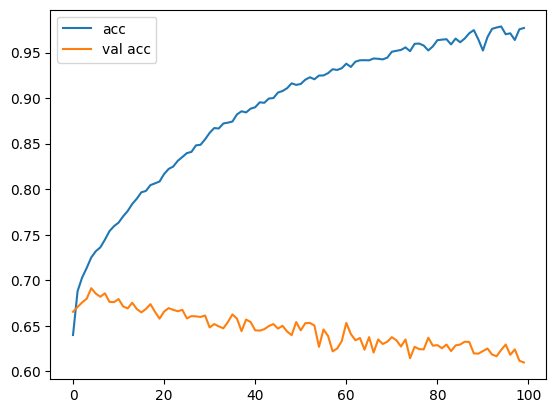

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()

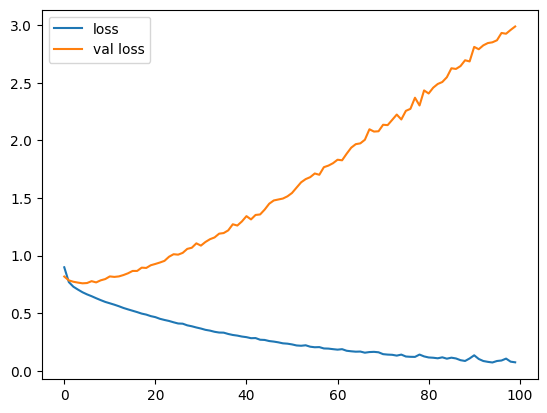

In [27]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

[0]	validation_0-mlogloss:1.45156	validation_1-mlogloss:1.45360
[1]	validation_0-mlogloss:1.31654	validation_1-mlogloss:1.32116
[2]	validation_0-mlogloss:1.16543	validation_1-mlogloss:1.16960
[3]	validation_0-mlogloss:1.06493	validation_1-mlogloss:1.06993
[4]	validation_0-mlogloss:0.96145	validation_1-mlogloss:0.96794
[5]	validation_0-mlogloss:0.88237	validation_1-mlogloss:0.89046
[6]	validation_0-mlogloss:0.79961	validation_1-mlogloss:0.80835
[7]	validation_0-mlogloss:0.74960	validation_1-mlogloss:0.76005
[8]	validation_0-mlogloss:0.68432	validation_1-mlogloss:0.69493
[9]	validation_0-mlogloss:0.62744	validation_1-mlogloss:0.63846
[10]	validation_0-mlogloss:0.58155	validation_1-mlogloss:0.59300
[11]	validation_0-mlogloss:0.53357	validation_1-mlogloss:0.54481
[12]	validation_0-mlogloss:0.49643	validation_1-mlogloss:0.50811
[13]	validation_0-mlogloss:0.45987	validation_1-mlogloss:0.47172
[14]	validation_0-mlogloss:0.42503	validation_1-mlogloss:0.43691
[15]	validation_0-mlogloss:0.39982	

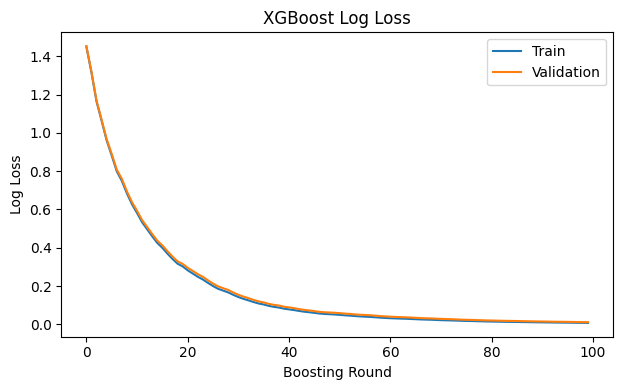

In [29]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Create XGBoost classifier
model = xgb.XGBClassifier(
    objective='multi:softprob',  # Multi-class classification
    n_estimators=100,           # Number of boosting rounds (like epochs)
    max_depth=6,               # Maximum tree depth
    learning_rate=0.1,         # Learning rate (like optimizer step size)
    subsample=0.8,             # Fraction of samples used for training each tree
    colsample_bytree=0.8,      # Fraction of features used for each tree
    random_state=42,
    eval_metric='mlogloss',    # Multi-class log loss
    early_stopping_rounds=10,   # Stop if no improvement for 10 rounds
    verbosity=1
)

# Train the model (corrected parameters)
model.fit(
    X_train_scaled, y_train_numeric,
    eval_set=[(X_train_scaled, y_train_numeric), (X_test_scaled, y_test_numeric)],
    verbose=True
)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test_numeric, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test_numeric, y_pred))

# Plot training history
results = model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, results['validation_1']['mlogloss'], label='Validation')
plt.ylabel('Log Loss')
plt.xlabel('Boosting Round')
plt.title('XGBoost Log Loss')
plt.legend()

plt.tight_layout()
plt.show()

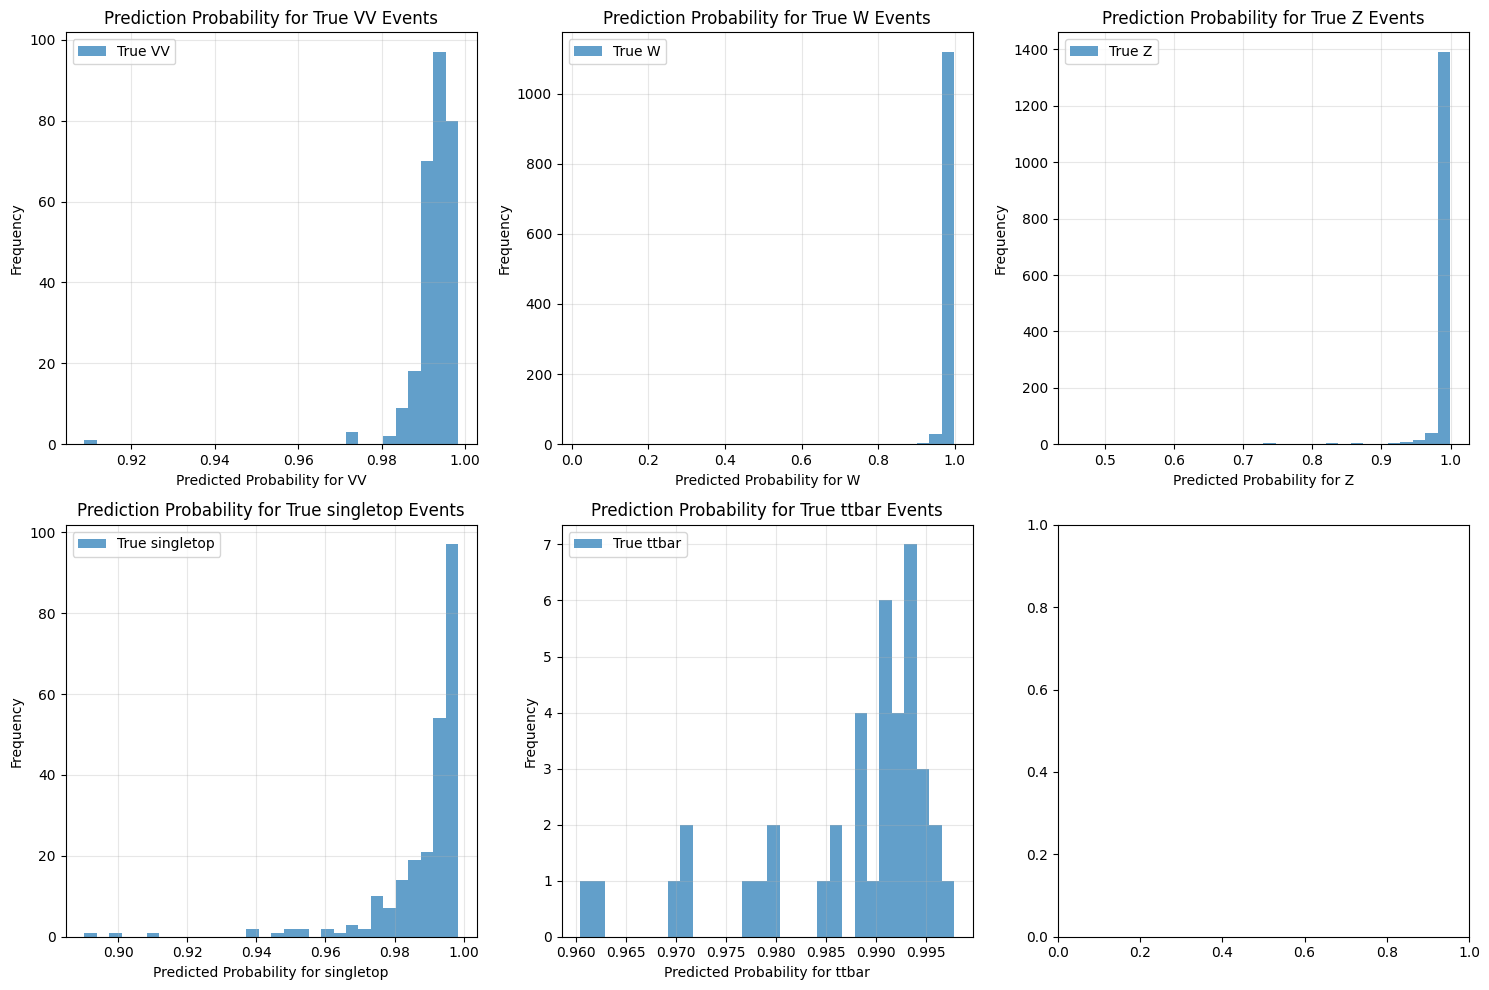

In [33]:

# Get predictions
y_pred_proba = model.predict_proba(X_test_scaled)

# Create a DataFrame for easier handling
pred_df = pd.DataFrame({
    'true_label': y_test_numeric,
    'predicted_class': np.argmax(y_pred_proba, axis=1)
})

# Add probability columns for each class
for i in range(y_pred_proba.shape[1]):
    pred_df[f'prob_class_{i}'] = y_pred_proba[:, i]

# Get unique particle types (assuming you have this mapping)
particle_names = np.unique(df.event_type)  # Adjust based on your uniqueTargets

# Plot probability histograms for each true event type
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for true_class in range(len(particle_names)):
    # Get data for this true class
    mask = pred_df['true_label'] == true_class
    class_data = pred_df[mask]

    if len(class_data) == 0:
        continue

    ax = axes[true_class]

    # Plot histogram of predicted probabilities for the correct class
    correct_probs = class_data[f'prob_class_{true_class}']
    ax.hist(correct_probs, bins=30, alpha=0.7, label=f'True {particle_names[true_class]}')

    ax.set_xlabel(f'Predicted Probability for {particle_names[true_class]}')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Prediction Probability for True {particle_names[true_class]} Events')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

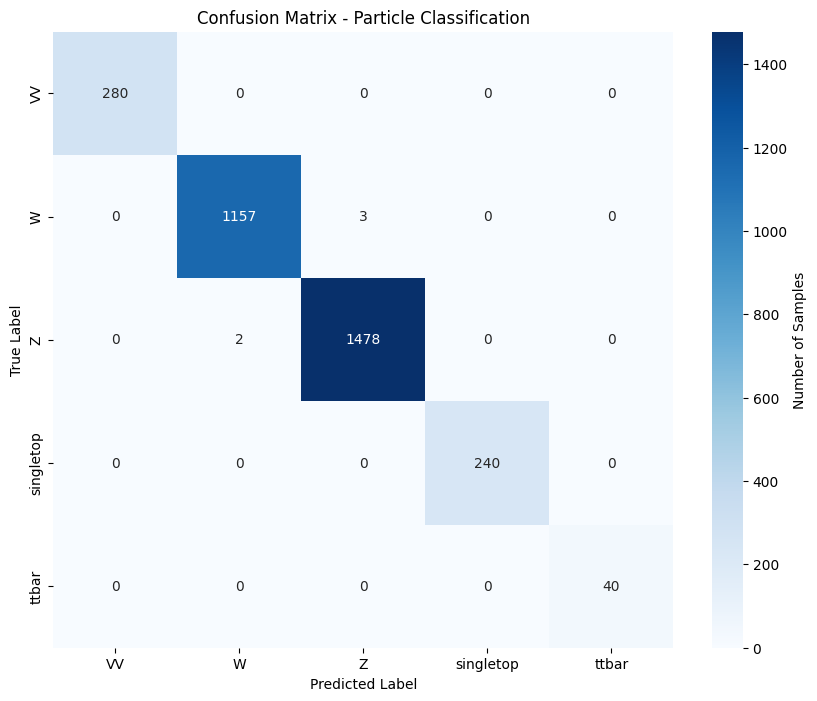

Classification Report:
              precision    recall  f1-score   support

          VV       1.00      1.00      1.00       280
           W       1.00      1.00      1.00      1160
           Z       1.00      1.00      1.00      1480
   singletop       1.00      1.00      1.00       240
       ttbar       1.00      1.00      1.00        40

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200



In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get predictions
y_pred = model.predict(X_test_scaled)

# Create confusion matrix
cm = confusion_matrix(y_test_numeric, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=particle_names, yticklabels=particle_names,
            cbar_kws={'label': 'Number of Samples'})
plt.title('Confusion Matrix - Particle Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("Classification Report:")
print(classification_report(y_test_numeric, y_pred, target_names=particle_names))